## Primera parte:
- Construya un histograma de carga

In [1]:
from numpy import loadtxt, math, array, zeros
from pylab import plot, show, xlim, ylim, grid, exp
from scipy.optimize import leastsq
import random

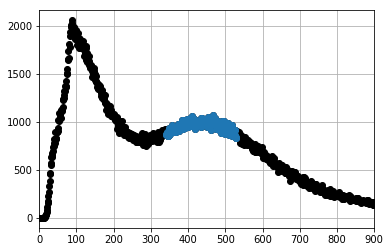

In [2]:
ch = loadtxt("carga_chitaga.dat", float)

xmin = 350
xmax = 540

plot(ch[:,0],ch[:,1],'ko')
plot(ch[xmin:xmax,0],ch[xmin:xmax,1],'o')

xlim(1, 900)
grid("on")
show()

- Ajuste una función gausiana 

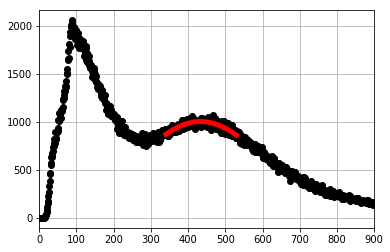

media = 433.7; sigma = 174.2


In [3]:
fitfunc = lambda p, x: p[0]*exp(-0.5*((x-p[1])*p[2])*((x-p[1])*p[2]))
errfunc = lambda p, x, y: (y - fitfunc(p, x))

init = [1.e3, 450., 1.]

out = leastsq(errfunc, init, args=(ch[xmin:xmax,0], ch[xmin:xmax,1]))
c = out[0]


plot(ch[:,0],ch[:,1],'ko')
plot(ch[xmin:xmax,0], fitfunc(c, ch[xmin:xmax,0]), 'r-', linewidth=5 )

xlim(1, 900)
grid("on")

show()

print('media = %0.1f; sigma = %0.1f' % (c[1], abs(1./c[2])) )

## Segunda parte:

- Busque los pulsos que tengan un área entre $\mu\pm\sigma$
- Construya un pulso promedio y ajuste una función que permita caracterizarlo.
- Escriba un código que permita diferenciar los pulsos en función de la caracterización anterior.